# Data Science for Competitive Improvement in League of Legends
## Final Project – Analysis Notebook

**Student:** Andrew Laurence T. Fat  
**Role:** Top Lane


## 1. Data Loading & Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load match data (replace filename with your exported Riot API CSV)
df = pd.read_csv('combine.csv')

# Preview data
df.head()

,match_id,game_mode,game_start_timestamp,game_start_date,game_end_date,game_duration,champion,position,kills,deaths,...,gold_earned,cs,cs_per_minute,damage_dealt,damage_taken,damage_objectives,damage_towers,damage_dragons_estimated,damage_per_minute,win
0,SG2_112279566,Ranked Flex,1763218348853,2025-11-15 14:52:28,2025-11-15 15:18:51,1583,Hwei,MIDDLE,6,5,...,10914,155,5.87,28577,19751,775,0,775,1083.15,False
1,SG2_112216447,Ranked Flex,1763201148284,2025-11-15 10:05:48,2025-11-15 10:33:01,1633,Volibear,JUNGLE,12,3,...,12882,149,5.47,15767,30843,43427,3551,39876,579.31,True
2,SG2_112207340,Ranked Flex,1763198358470,2025-11-15 09:19:18,2025-11-15 09:58:17,2339,KSante,TOP,8,3,...,16760,227,5.82,31086,48018,9486,2852,6634,797.42,True
3,SG2_112091320,Normal Draft,1763137563769,2025-11-14 16:26:03,2025-11-14 16:53:22,1639,Velkoz,UTILITY,5,5,...,9526,30,1.10,28080,14903,3655,2471,1184,1027.94,True
4,SG2_112084244,Normal Draft,1763135906952,2025-11-14 15:58:26,2025-11-14 16:20:07,1301,Thresh,UTILITY,2,4,...,6414,21,0.97,7352,14658,632,632,0,339.06,False


## 2. Data Cleaning

In [ ]:
# Remove remake games (under 5 minutes)
df = df[df['game_duration'] >= 300]

# Convert win column to binary
df['win'] = df['win'].astype(int)

df['gold_per_minute'] = df["gold_earned"] / (df['game_duration'] / 60)

df.describe()

,game_start_timestamp,game_duration,kills,deaths,assists,KDA,gold_earned,cs,cs_per_minute,damage_dealt,damage_taken,damage_objectives,damage_towers,damage_dragons_estimated,damage_per_minute,win,gold_per_minute
count,3.990000e+02,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,1.765292e+12,1846.573935,4.719298,5.761905,10.080201,3.562556,11318.283208,150.972431,4.864612,21838.473684,32907.729323,10659.353383,3815.115288,6844.238095,692.241028,0.508772,366.725279
std,2.917802e+09,414.556400,3.961042,2.986730,7.230142,3.503155,3378.746402,75.416843,2.176431,12386.486650,15840.797705,10741.097422,3725.184132,9933.053423,319.586025,0.500551,72.752593
min,1.759050e+12,461.000000,0.000000,0.000000,0.000000,0.000000,1763.000000,9.000000,0.450000,448.000000,1065.000000,0.000000,0.000000,0.000000,58.310000,0.000000,220.238353
25%,1.763043e+12,1617.500000,2.000000,3.000000,5.000000,1.500000,9288.000000,111.500000,4.490000,13225.500000,22366.000000,3488.000000,880.500000,1065.500000,472.810000,0.000000,321.291631
50%,1.765489e+12,1835.000000,4.000000,6.000000,9.000000,2.500000,10973.000000,168.000000,5.470000,20686.000000,31322.000000,7577.000000,2748.000000,3491.000000,669.610000,1.000000,362.393352
75%,1.767965e+12,2113.000000,7.000000,8.000000,13.000000,4.330000,13270.000000,203.000000,6.285000,28681.500000,41645.500000,13978.500000,5691.500000,7841.500000,878.130000,1.000000,407.515416
max,1.769787e+12,3307.000000,32.000000,19.000000,41.000000,23.000000,26503.000000,340.000000,8.810000,109156.000000,165606.000000,62309.000000,21564.000000,56573.000000,2533.600000,1.000000,787.074010


In [ ]:
# Filter Ranked Solo/Duo TOP games
df = df[(df['game_mode'] == 'Ranked Solo/Duo') & (df['position'] == 'TOP')]

In [ ]:
df.tail()

,match_id,game_mode,game_start_timestamp,game_start_date,game_end_date,game_duration,champion,position,kills,deaths,...,cs,cs_per_minute,damage_dealt,damage_taken,damage_objectives,damage_towers,damage_dragons_estimated,damage_per_minute,win,gold_per_minute
403,SG2_130663961,Ranked Solo/Duo,1769356871670,2026-01-25 16:01:11,2026-01-25 16:39:23,2292,Sion,TOP,2,7,...,302,7.91,30108,60753,15929,8711,7218,788.17,0,405.366492
404,SG2_130431452,Ranked Solo/Duo,1769277582019,2026-01-24 17:59:42,2026-01-24 18:39:33,2391,Ambessa,TOP,2,11,...,189,4.74,18781,48449,5685,4083,1602,471.29,0,275.357591
405,SG2_130420776,Ranked Solo/Duo,1769275586535,2026-01-24 17:26:26,2026-01-24 17:55:23,1737,Aatrox,TOP,11,1,...,219,7.56,33274,31711,14245,9306,4939,1149.36,1,490.120898
406,SG2_130412159,Ranked Solo/Duo,1769273216649,2026-01-24 16:46:56,2026-01-24 17:19:31,1955,Gnar,TOP,4,7,...,192,5.89,36235,43685,9461,6086,3375,1112.07,0,338.363171
407,SG2_130397306,Ranked Solo/Duo,1769270293972,2026-01-24 15:58:13,2026-01-24 16:39:45,2492,Pantheon,TOP,7,7,...,229,5.51,34840,43715,9344,7463,1881,838.84,1,369.317817


## 3. Period Labeling (Before vs After)

In [ ]:
# Convert game date
df['game_date'] = pd.to_datetime(df['game_start_date'], errors='coerce')

research_start = pd.Timestamp("2025-11-16")

# Use lowercase consistently
df['period'] = np.where(df['game_date'] < research_start, 'before', 'after')

df['period'].value_counts()

before_df = df[df['period'] == 'before']
after_df = df[df['period'] == 'after']

In [ ]:
df.head()

,match_id,game_mode,game_start_timestamp,game_start_date,game_end_date,game_duration,champion,position,kills,deaths,...,damage_dealt,damage_taken,damage_objectives,damage_towers,damage_dragons_estimated,damage_per_minute,win,gold_per_minute,game_date,period
5,SG2_111856677,Ranked Solo/Duo,1763042662518,2025-11-13 14:04:22,2025-11-13 14:31:43,1641,Pantheon,TOP,6,2,...,14318,20178,16568,5648,10920,523.51,1,396.453382,2025-11-13 14:04:22,before
7,SG2_111839303,Ranked Solo/Duo,1763038570687,2025-11-13 12:56:10,2025-11-13 13:29:08,1978,Sion,TOP,7,6,...,26955,46637,4844,4436,408,817.64,0,382.264914,2025-11-13 12:56:10,before
12,SG2_111487789,Ranked Solo/Duo,1762871793429,2025-11-11 14:36:33,2025-11-11 15:08:04,1891,Sion,TOP,2,4,...,23313,37220,2761,2281,480,739.70,0,431.041777,2025-11-11 14:36:33,before
13,SG2_111258458,Ranked Solo/Duo,1762778015160,2025-11-10 12:33:35,2025-11-10 13:04:11,1836,Pantheon,TOP,5,4,...,17960,24607,14309,10999,3310,586.93,1,406.503268,2025-11-10 12:33:35,before
14,SG2_111239928,Ranked Solo/Duo,1762773206577,2025-11-10 11:13:26,2025-11-10 11:49:33,2167,Ornn,TOP,5,5,...,22244,42694,7108,4808,2300,615.89,0,367.171204,2025-11-10 11:13:26,before


In [ ]:
before = df[df['period'] == 'before']
after = df[df['period'] == 'after']

print('Before period matches:', len(before))
print('After period matches:', len(after))

Before period matches: 22
After period matches: 163


## 4. Descriptive Statistics Comparison

In [ ]:
metrics = ['cs_per_minute', 'KDA', 'gold_earned', 'damage_dealt', 'cs', 'damage_taken']

df.groupby('period')[metrics + ['win']].mean()

,cs_per_minute,KDA,gold_earned,damage_dealt,cs,damage_taken,win
period,,,,,,,
after,6.075399,3.303313,11441.889571,23286.907975,185.288344,33528.595092,0.496933
before,5.846818,2.992273,11844.363636,21608.318182,182.772727,35104.727273,0.409091


## 5. Visualization of Improvement

/tmp/ipython-input-1858960869.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before, after], labels=['Before', 'After'])


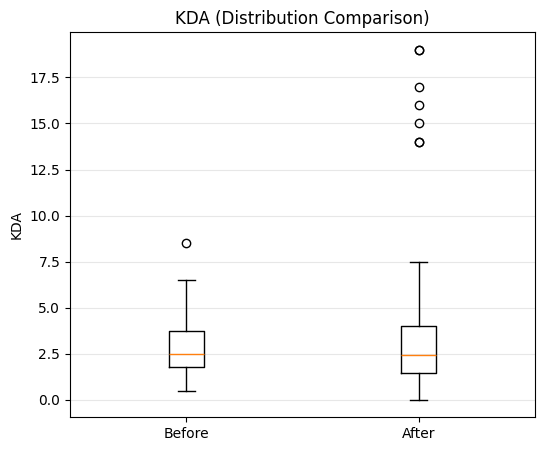

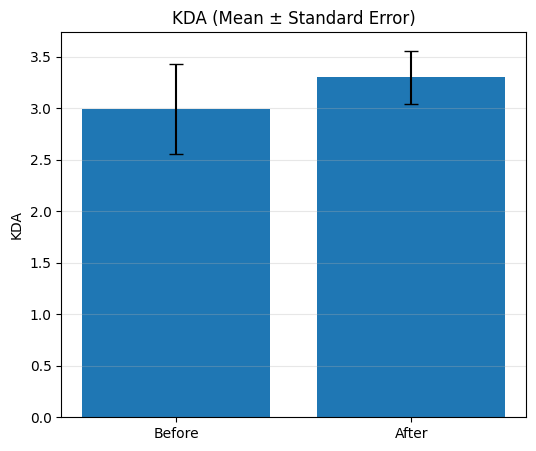

/tmp/ipython-input-1858960869.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before, after], labels=['Before', 'After'])


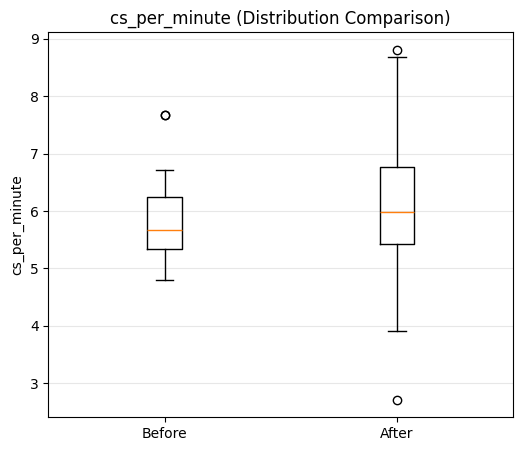

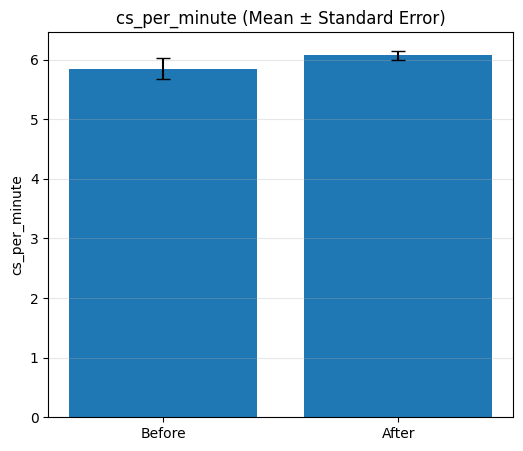

/tmp/ipython-input-1858960869.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before, after], labels=['Before', 'After'])


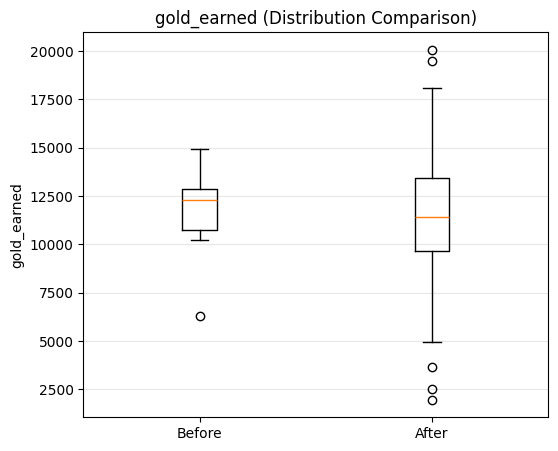

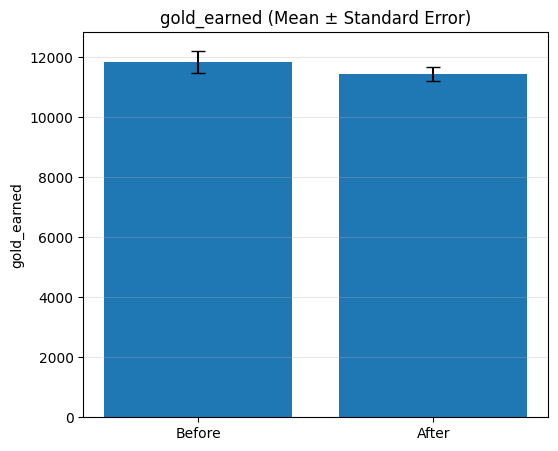

/tmp/ipython-input-1858960869.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before, after], labels=['Before', 'After'])


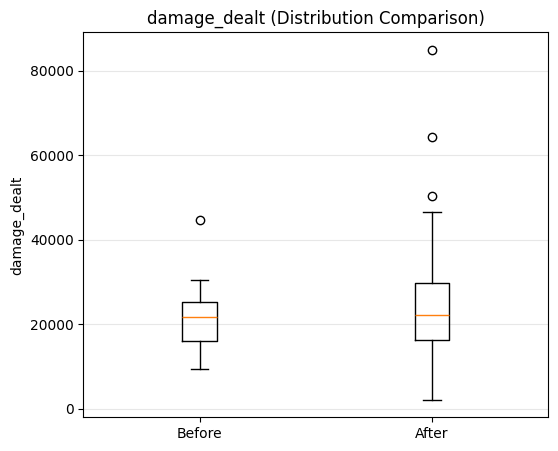

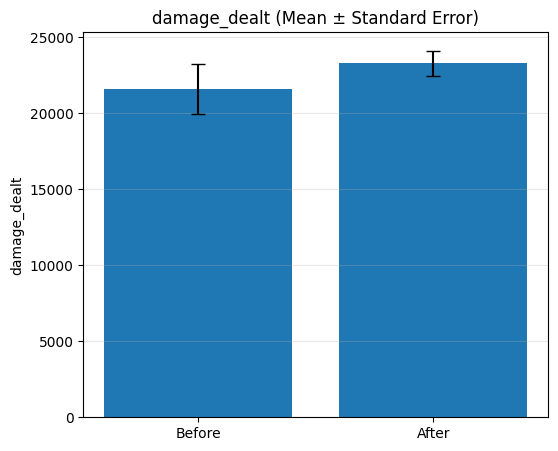

In [ ]:
# Metrics you want to visualize
metrics = [
    'KDA',
    'cs_per_minute',
    'gold_earned',
    'damage_dealt'
]

for metric in metrics:

    if metric not in df.columns:
        continue

    before = df[df['period'] == 'before'][metric].dropna()
    after = df[df['period'] == 'after'][metric].dropna()

    if len(before) < 2 or len(after) < 2:
        continue

    # ----------------------------
    # 1️⃣ BOX PLOT (Distribution)
    # ----------------------------
    plt.figure(figsize=(6,5))
    plt.boxplot([before, after], labels=['Before', 'After'])
    plt.title(f"{metric} (Distribution Comparison)")
    plt.ylabel(metric)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

    # ----------------------------
    # 2️⃣ BAR GRAPH (Mean ± SE)
    # ----------------------------
    means = [before.mean(), after.mean()]
    errors = [before.sem(), after.sem()]

    plt.figure(figsize=(6,5))
    plt.bar(['Before', 'After'], means, yerr=errors, capsize=5)
    plt.title(f"{metric} (Mean ± Standard Error)")
    plt.ylabel(metric)
    plt.grid(axis='y', alpha=0.3)
    plt.show()


## 6. Correlation Analysis

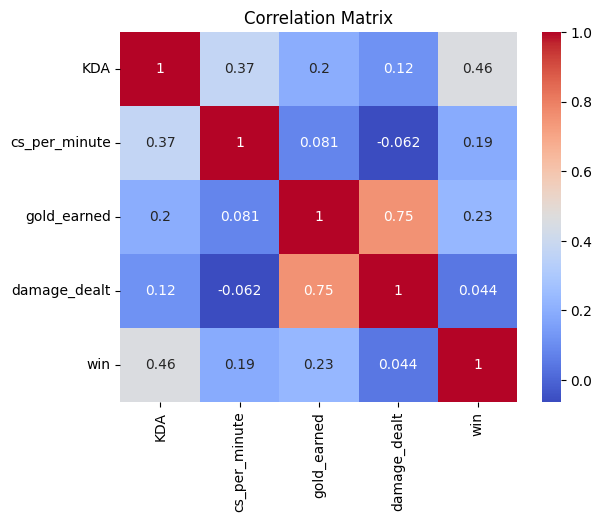

In [ ]:
corr = df[metrics + ['win']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 7. Hypothesis Testing (T-Test)

In [ ]:
from scipy.stats import ttest_ind

alpha = 0.05  # significance level

hypothesis_metrics = {
    "Win Rate": "win",
    "CS per Minute": "cs_per_minute",
    "KDA": "KDA",
    "Gold Earned": "gold_earned",
    "Damage Dealt": "damage_dealt",
    "CS": "cs",
    "Damage Taken": "damage_taken"
}

results = []

for metric_name, column in hypothesis_metrics.items():

    # Skip if column does not exist
    if column not in df.columns:
        continue

    # FIX: use lowercase
    before = df[df['period'] == 'before'][column].dropna()
    after = df[df['period'] == 'after'][column].dropna()

    # Prevent empty samples
    if len(before) < 2 or len(after) < 2:
        continue

    # Welch's t-test
    t_stat, p_two_tailed = ttest_ind(
        after, before, equal_var=False
    )

    # One-tailed test (After > Before)
    if t_stat > 0:
        p_one_tailed = p_two_tailed / 2
    else:
        p_one_tailed = 1 - (p_two_tailed / 2)

    decision = (
        "Reject H₀ (Significant Improvement)"
        if p_one_tailed < alpha
        else "Fail to Reject H₀"
    )

    results.append({
        "Metric": metric_name,
        "Mean Before": before.mean(),
        "Mean After": after.mean(),
        "t-statistic": t_stat,
        "p-value (one-tailed)": p_one_tailed,
        "Decision": decision
    })

hypothesis_results = pd.DataFrame(results)

hypothesis_results

,Metric,Mean Before,Mean After,t-statistic,p-value (one-tailed),Decision
0,Win Rate,0.409091,0.496933,0.768816,0.224345,Fail to Reject H₀
1,CS per Minute,5.846818,6.075399,1.209553,0.118002,Fail to Reject H₀
2,KDA,2.992273,3.303313,0.613781,0.271529,Fail to Reject H₀
3,Gold Earned,11844.363636,11441.889571,-0.910178,0.815930,Fail to Reject H₀
4,Damage Dealt,21608.318182,23286.907975,0.917459,0.182740,Fail to Reject H₀
5,CS,182.772727,185.288344,0.345023,0.366108,Fail to Reject H₀
6,Damage Taken,35104.727273,33528.595092,-0.656015,0.741811,Fail to Reject H₀


## 8. Champion Specialization Analysis

In [ ]:
# Top 5 most played champions
frequent_champions = df['champion'].value_counts().head(5).index.tolist()

print("Frequent Champions:", frequent_champions)

Frequent Champions: ['Ambessa', 'Aatrox', 'Pantheon', 'Gnar', 'Sion']


In [ ]:
# Champion frequency
champion_counts = df['champion'].value_counts()

champion_counts.head(10)

,count
champion,
Ambessa,42
Aatrox,26
Pantheon,23
Gnar,19
Sion,19
KSante,13
Ornn,13
Volibear,12
Kled,6


In [ ]:
if 'champion' in df.columns and 'period' in df.columns:

    print("\n" + "=" * 100)
    print("CHAMPION-SPECIFIC PERFORMANCE IMPROVEMENT (KDA)")
    print("=" * 100)

    champion_improvements = []

    for champion in frequent_champions:
        champ_data = df[df['champion'] == champion]

        before_kda = champ_data[champ_data['period'] == 'before']['KDA'].mean()
        after_kda = champ_data[champ_data['period'] == 'after']['KDA'].mean()

        if pd.notna(before_kda) and pd.notna(after_kda):
            change = after_kda - before_kda
            pct_change = (change / before_kda * 100) if before_kda != 0 else 0

            champion_improvements.append({
                'champion': champion,
                'change': change
            })

            direction = '↑' if change > 0 else '↓'
            print(f"{champion:<20} {before_kda:<10.2f} → {after_kda:<10.2f} {direction}{abs(change):.2f}")


CHAMPION-SPECIFIC PERFORMANCE IMPROVEMENT (KDA)
Aatrox               2.08       → 3.40       ↑1.31
Pantheon             3.58       → 2.34       ↓1.25
Gnar                 0.75       → 5.12       ↑4.37
Sion                 3.86       → 4.80       ↑0.95


In [ ]:
# Analyze multiple metrics for each champion
if 'champion' in df.columns and 'period' in df.columns:
    metrics_to_analyze = ['KDA', 'cs_per_minute', 'gold_per_minute']

    for metric in metrics_to_analyze:
        if metric in df.columns:
            print(f"\n{'='*100}")
            print(f"CHAMPION-SPECIFIC: {metric.replace('_', ' ').upper()}")
            print("=" * 100)
            print(f"{'Champion':<20} {'Before':<15} {'After':<15} {'Change':<15} {'Improved?'}")
            print("=" * 100)

            for champion in frequent_champions:
                champ_data = df[df['champion'] == champion]

                before_val = champ_data[champ_data['period'] == 'before'][metric].mean()
                after_val = champ_data[champ_data['period'] == 'after'][metric].mean()

                if pd.notna(before_val) and pd.notna(after_val):
                    change = after_val - before_val
                    improved = 'YES' if change > 0 else 'NO'
                    direction = '↑' if change > 0 else '↓'

                    print(f"{champion:<20} {before_val:<15.2f} {after_val:<15.2f} {direction}{abs(change):<14.2f} {improved}")


CHAMPION-SPECIFIC: KDA
Champion             Before          After           Change          Improved?
Aatrox               2.08            3.40            ↑1.31           YES
Pantheon             3.58            2.34            ↓1.25           NO
Gnar                 0.75            5.12            ↑4.37           YES
Sion                 3.86            4.80            ↑0.95           YES

CHAMPION-SPECIFIC: CS PER MINUTE
Champion             Before          After           Change          Improved?
Aatrox               5.14            5.93            ↑0.78           YES
Pantheon             5.47            5.59            ↑0.11           YES
Gnar                 6.19            6.50            ↑0.31           YES
Sion                 6.59            7.20            ↑0.61           YES

CHAMPION-SPECIFIC: GOLD PER MINUTE
Champion             Before          After           Change          Improved?
Aatrox               355.76          358.16          ↑2.40           YES
Pantheon     

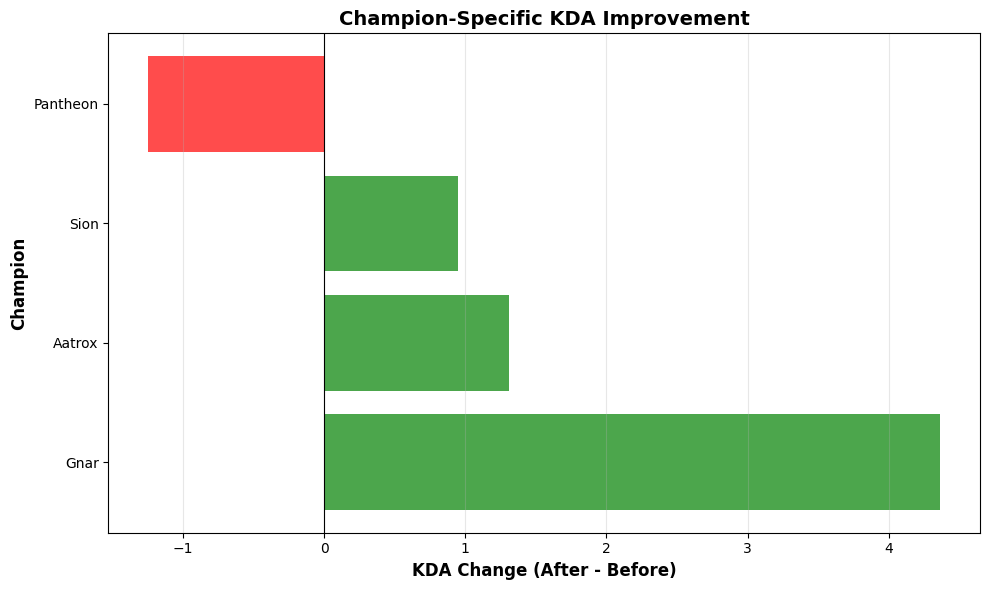

In [ ]:
# Visualize champion-specific improvements
import matplotlib.pyplot as plt
import numpy as np

if 'champion' in df.columns and 'period' in df.columns and len(champion_improvements) > 0:
    # Sort by improvement
    champion_improvements_sorted = sorted(champion_improvements, key=lambda x: x['change'], reverse=True)

    champions = [c['champion'] for c in champion_improvements_sorted]
    changes = [c['change'] for c in champion_improvements_sorted]
    colors = ['green' if c > 0 else 'red' for c in changes]

    plt.figure(figsize=(10, 6))
    plt.barh(champions, changes, color=colors, alpha=0.7)
    plt.xlabel('KDA Change (After - Before)', fontsize=12, fontweight='bold')
    plt.ylabel('Champion', fontsize=12, fontweight='bold')
    plt.title('Champion-Specific KDA Improvement', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('rq3_champion_improvements.png', dpi=300, bbox_inches='tight')
    plt.show()

## 10. Conclusion

The analysis evaluates measurable improvement in Top Lane performance. Statistical tests and predictive modeling determine whether post-period performance metrics significantly exceed pre-period results and better explain match outcomes.